## Content:
- **[Part 1](#part1)- Importing the data set, packages used**
- **[Part 2](#part2)- Preprocessing Data**
- **[Part 3](#part3) -  Decision Trees**
- **[Part 4](#part4) -  Random Forest**
- **[Part 5](#part5) -  Naive Bayes**
- **[Part 6](#part6) - Gradient Boost Classifier**
- **[Part 7](#part7) - Cat Boost Classifier**
- **[Part 8](#part8) - XGB Boost Classifier**


[Back to top](#Content:)


<a id='part1'></a>

# Part 1 -  Importing the data set

In [59]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

In [60]:
random.seed(0)

In [61]:
# Loading Dataset
df = pd.read_csv("healthcare/train_data.csv", na_values=['NA', '?'])

In [62]:
# Dropping na values for 
df = df.dropna()

In [63]:
# Dropping case_id
df.drop(['case_id'], axis=1, inplace=True)

[Back to top](#Content:)


<a id='part2'></a>

# Part 2 -  Preprocessing Data

### Label encoded Data

In [64]:
from sklearn.preprocessing import LabelEncoder 
## Pre processing these columns

string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission', 'Severity of Illness', 'Age' ]
encoder = LabelEncoder()

## label_encoded data initialisation
X_le = df.drop(['Stay'], axis=1) # dropping case id
y_le = df['Stay']

## label encoding
y_le = encoder.fit_transform(y_le)
for column in string_columns :
    X_le[column] = encoder.fit(X_le[column]).transform(X_le[column])



### Scaling and Splitting Data 

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = X_le.values
y = y_le.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

### Scoring

In [10]:
K = 10 # Num of Classes 
# Classes can be ranked here from 0-10
def score(pred, target):
    error = (np.mean(np.abs(pred-target)))/K
    score = 1 - error
    return score

# Models

We start by base models, models used here are that are most adapted to the nature of the problem :
- Decision Tree
- Random Forest
- Naive Bayes
- XGBoost

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[Back to top](#Content:)


<a id='part3'></a>

# Part 3 -  Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Instantiating and fitting the data
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [13]:
y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
score = score(y_test, y_pred)

print('Accuracy : %.3f' % acc)
print('Score : %.3f' % score)

Accuracy : 0.296
Score : 0.849


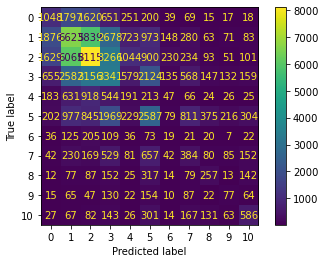

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

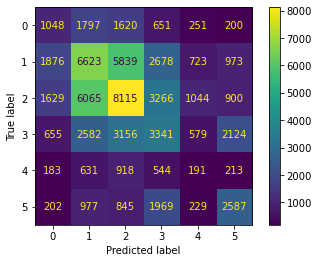

In [15]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

Decision Trees appear to give reasonnable results. We still have lot of confusion especially between close categories.

## Decision tree with gini criterion

In [16]:
# Instantiating and fitting the data
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
score = 1 - (np.mean(np.abs(y_pred-y_test)))/K

print('Accuracy : %.3f' % acc)
print('Score : %.3f' % score)

Accuracy : 0.299
Score : 0.851


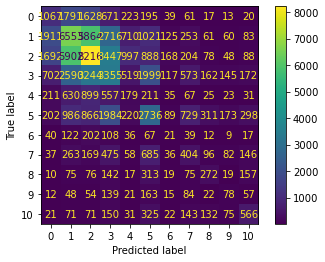

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

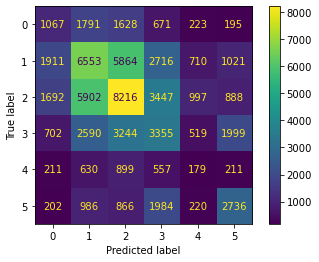

In [19]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

We get same result, Dataset is large enough to avoid using cross validation but we give it a try anyways

In [20]:
kf = KFold(5, shuffle=True)
tree = DecisionTreeClassifier(criterion='entropy')
fold = 0 
for train_index, validate_index in kf.split(X,y):
    tree.fit(X[train_index], y[train_index])
    y_test_v = y[validate_index]
    y_pred = tree.predict(X[validate_index])
    score = 1 - (np.mean(np.abs(y_pred-y_test_v)))/K
    fold += 1
    print(f'Results after fold {fold}')
    print(f'Accuracy : %.4f' % accuracy_score(y_test_v, y_pred))
    print(f'Score : %.4f' % score)
    print('---------------------')

Results after fold 1
Accuracy : 0.3000
Score : 0.8511
---------------------
Results after fold 2
Accuracy : 0.3008
Score : 0.8508
---------------------
Results after fold 3
Accuracy : 0.2972
Score : 0.8503
---------------------
Results after fold 4
Accuracy : 0.2979
Score : 0.8499
---------------------
Results after fold 5
Accuracy : 0.3008
Score : 0.8510
---------------------


Results are consisting, now let's move to other algorithms and see if we can improve

[Back to top](#Content:)


<a id='part4'></a>

# Part 4 -  Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Instantiating and fitting the data
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Accuracy : 0.369
Score : 0.8788


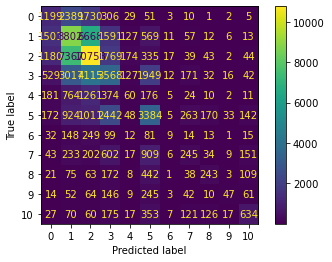

In [23]:
y_pred = forest.predict(X_test)
score = 1 - (np.mean(np.abs(y_pred-y_test)))/K
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

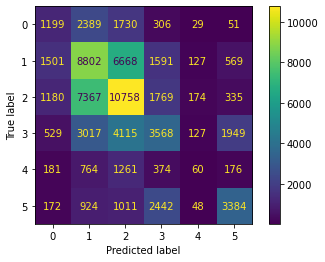

In [24]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

Both accuracy and score are better, we are going to try with different n_estimators

In [25]:
accuracy_data = []
score_data = []

for i in range(20,70,4):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'n_estimators : {i}')
    print(f'Accuracy : %.4f' % accuracy)
    print(f'Score  : %.4f' % score)
    print('--------------')
    accuracy_data.append(accuracy)
    score_data.append(score)
    
    

n_estimators : 20
Accuracy : 0.3855
Score  : 0.8840
--------------
n_estimators : 24
Accuracy : 0.3895
Score  : 0.8852
--------------
n_estimators : 28
Accuracy : 0.3934
Score  : 0.8862
--------------
n_estimators : 32
Accuracy : 0.3933
Score  : 0.8862
--------------
n_estimators : 36
Accuracy : 0.3940
Score  : 0.8869
--------------
n_estimators : 40
Accuracy : 0.3965
Score  : 0.8872
--------------
n_estimators : 44
Accuracy : 0.3971
Score  : 0.8879
--------------
n_estimators : 48
Accuracy : 0.4003
Score  : 0.8884
--------------
n_estimators : 52
Accuracy : 0.3999
Score  : 0.8883
--------------
n_estimators : 56
Accuracy : 0.4007
Score  : 0.8884
--------------
n_estimators : 60
Accuracy : 0.4009
Score  : 0.8885
--------------
n_estimators : 64
Accuracy : 0.4017
Score  : 0.8890
--------------
n_estimators : 68
Accuracy : 0.4021
Score  : 0.8889
--------------


## Plotting accuracy and score with increasing n_estimators

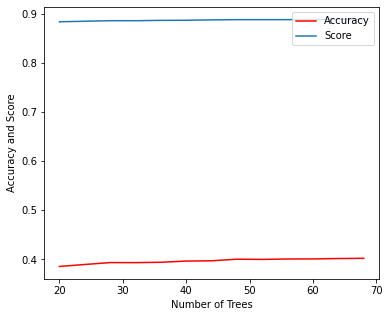

In [26]:
nums = []
for i in range(20,70,4):
    nums.append(i)

fig = plt.figure(figsize=(6,5))
plt.plot(nums, accuracy_data, c='r', label='Accuracy')
plt.plot(nums, score_data, label='Score')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy and Score')
plt.legend(loc='upper right')
plt.show()
    

Looks like we reached the maximum of accuracy/score at around n_estimators = 60, we will keep this one and move forward

## Random Forest n_estimators = 60



In [29]:
# Instantiating and fitting the data
forest = RandomForestClassifier(n_estimators=60, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=60)

Accuracy : 0.398
Score : 0.8884


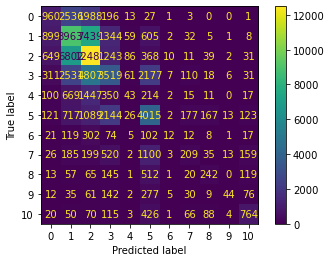

In [30]:
y_pred = forest.predict(X_test)
score = 1 - (np.mean(np.abs(y_pred-y_test)))/K
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

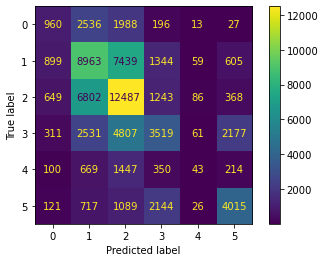

In [31]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

## Plotting Histograms to compare 

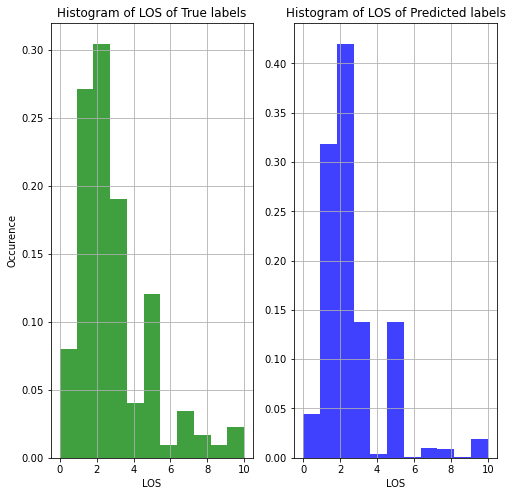

In [32]:
labels = np.unique(df['Stay'])
labels[-1] = '100+'

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8, 8)
ax1.grid(True)
ax1.hist(y_test, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)
ax1.set_title('Histogram of LOS of True labels')
ax1.set_xlabel('LOS')
ax1.set_ylabel('Occurence')

ax2.grid(True)
ax2.hist(y_pred, bins=11, label=labels, density=True, facecolor='b', alpha=0.75)
ax2.set_title('Histogram of LOS of Predicted labels')
ax2.set_xlabel('LOS')



plt.show()

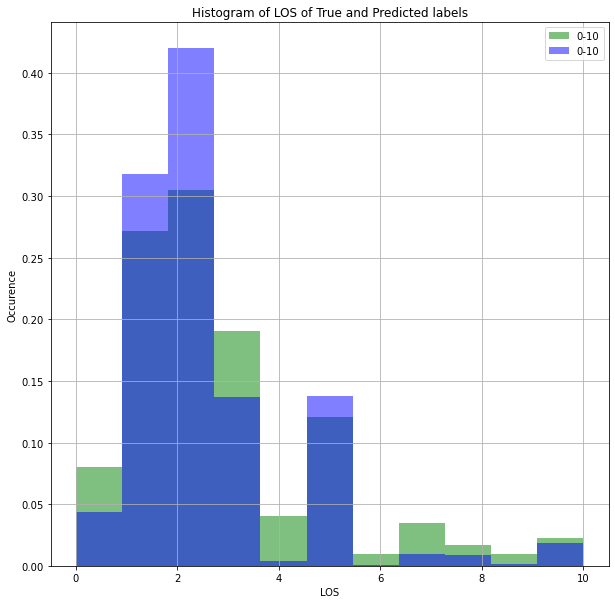

In [33]:
labels = np.unique(df['Stay'])
labels[-1] = '100+'

plt.figure(figsize = (10,10))

plt.hist(y_test, bins=11, label=labels, density=True, facecolor='g', alpha=0.5)
plt.hist(y_pred, bins=11, label=labels, density=True, facecolor='b', alpha=0.5)
plt.title('Histogram of LOS of True and Predicted labels')
plt.xlabel('LOS')
plt.ylabel('Occurence')
plt.legend()
plt.grid(True)



plt.show()

The model reproduce the distribution of the data well enough, but we can see that it predicts categories 1 and 2, more than it should while predicting categories 0 and 3 less. It also neglects categories 6, 7 ...10.


[Back to top](#Content:)


<a id='part5'></a>

# Part 5 -  Naive Bayes

## Base Model for Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1)
model.fit(X_train, y_train)


GaussianNB(var_smoothing=1)

Accuracy : 0.323
Score : 0.8655


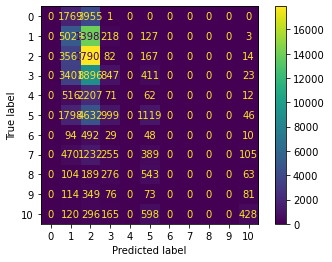

In [35]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

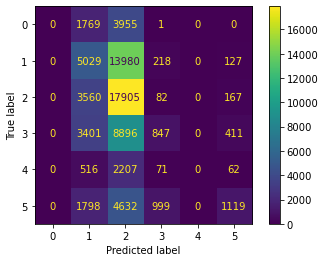

In [36]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

## Testing different smoothing values 

In [39]:
smoothing = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

for var_smoothing in smoothing :
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    print(f'Smoothing parameter : {var_smoothing}')
    print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Score : %.4f' % score)
    print('----------------------')
    

Smoothing parameter : 1e-05
Accuracy : 0.362
Score : 0.8755
----------------------
Smoothing parameter : 0.0001
Accuracy : 0.363
Score : 0.8755
----------------------
Smoothing parameter : 0.001
Accuracy : 0.362
Score : 0.8755
----------------------
Smoothing parameter : 0.01
Accuracy : 0.362
Score : 0.8755
----------------------
Smoothing parameter : 0.1
Accuracy : 0.359
Score : 0.8750
----------------------
Smoothing parameter : 1
Accuracy : 0.323
Score : 0.8661
----------------------
Smoothing parameter : 10
Accuracy : 0.278
Score : 0.8532
----------------------


We can see that we get best results when the smoothing parameter is in the order of 1e-4.

It seems like model with var_smoothing = 1e-4 might be the best choice when choosing Naive Bayes, let's see how the histogram looks like

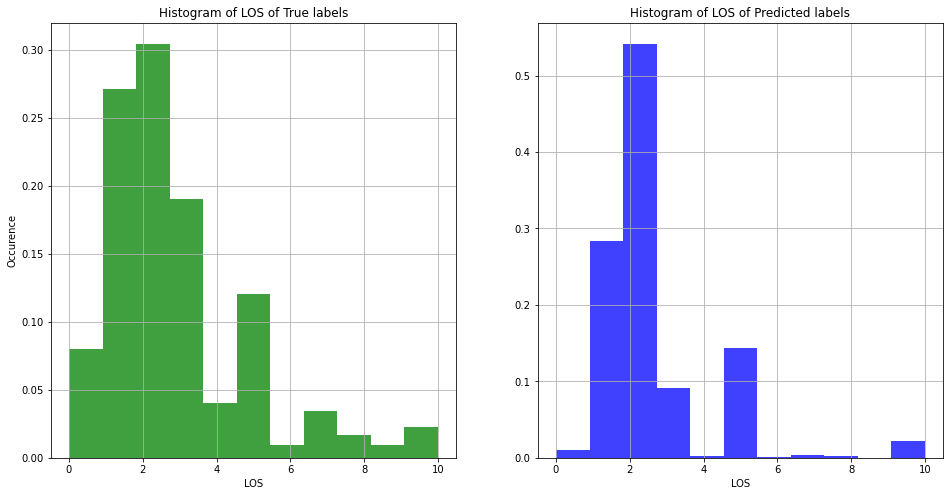

In [40]:

model = GaussianNB(var_smoothing=1e-4)
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

labels = np.unique(df['Stay'])
labels[-1] = '100+'

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
ax1.grid(True)
ax1.hist(y_test, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)
ax1.set_title('Histogram of LOS of True labels')
ax1.set_xlabel('LOS')
ax1.set_ylabel('Occurence')

ax2.grid(True)
ax2.hist(y_pred, bins=11, label=labels, density=True, facecolor='b', alpha=0.75)
ax2.set_title('Histogram of LOS of Predicted labels')
ax2.set_xlabel('LOS')



plt.show()

Naive Bayes fails to capture the shape of the distribution and seems to be overfitting by assigning lot of samples to categories 2

We try different models not seen in the course that are more powerful to see if we can have better results and compare

[Back to top](#Content:)


<a id='part6'></a>

# Part 6 -  Gradient Boost Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy : 0.415
Score : 0.8917


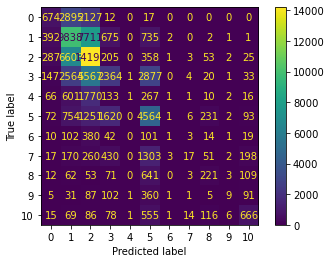

In [42]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

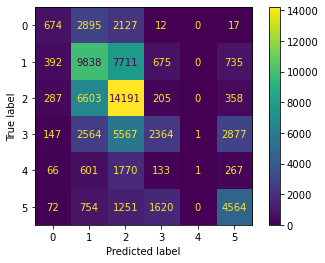

In [43]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

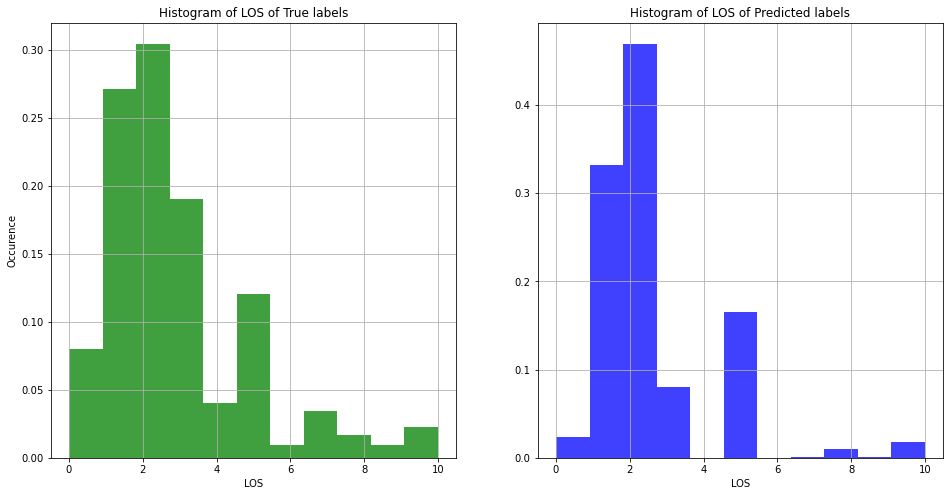

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
ax1.grid(True)
ax1.hist(y_test, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)
ax1.set_title('Histogram of LOS of True labels')
ax1.set_xlabel('LOS')
ax1.set_ylabel('Occurence')

ax2.grid(True)
ax2.hist(y_pred, bins=11, label=labels, density=True, facecolor='b', alpha=0.75)
ax2.set_title('Histogram of LOS of Predicted labels')
ax2.set_xlabel('LOS')



plt.show()

The best result we got for Random Forest was : Accuracy : 0.402 , Score : 0.889

Gradient Boost results are better : Accuracy : 0.415, Score : 0.8920

Nevertheless it stills suffers from the same problem as Random Forest as it fails to capture the distribution of data and overfits by predicting category 2 too often.




[Back to top](#Content:)


<a id='part7'></a>

# Part 7 -  Cat Boost Classifier

In [45]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000)
cb.fit(X_train, y_train)

Learning rate set to 0.104539
0:	learn: 2.2212377	total: 228ms	remaining: 3m 47s
1:	learn: 2.1025556	total: 346ms	remaining: 2m 52s
2:	learn: 2.0151265	total: 465ms	remaining: 2m 34s
3:	learn: 1.9475712	total: 587ms	remaining: 2m 26s
4:	learn: 1.8935372	total: 709ms	remaining: 2m 21s
5:	learn: 1.8490702	total: 824ms	remaining: 2m 16s
6:	learn: 1.8100927	total: 945ms	remaining: 2m 14s
7:	learn: 1.7791224	total: 1.07s	remaining: 2m 12s
8:	learn: 1.7532706	total: 1.19s	remaining: 2m 10s
9:	learn: 1.7313831	total: 1.31s	remaining: 2m 9s
10:	learn: 1.7101804	total: 1.45s	remaining: 2m 10s
11:	learn: 1.6912653	total: 1.57s	remaining: 2m 9s
12:	learn: 1.6772728	total: 1.7s	remaining: 2m 9s
13:	learn: 1.6632704	total: 1.83s	remaining: 2m 9s
14:	learn: 1.6511788	total: 1.96s	remaining: 2m 8s
15:	learn: 1.6410233	total: 2.08s	remaining: 2m 7s
16:	learn: 1.6326863	total: 2.21s	remaining: 2m 7s
17:	learn: 1.6253149	total: 2.34s	remaining: 2m 7s
18:	learn: 1.6184399	total: 2.45s	remaining: 2m 6s
19

160:	learn: 1.4995987	total: 21.5s	remaining: 1m 51s
161:	learn: 1.4993387	total: 21.6s	remaining: 1m 51s
162:	learn: 1.4991549	total: 21.8s	remaining: 1m 51s
163:	learn: 1.4989803	total: 21.9s	remaining: 1m 51s
164:	learn: 1.4987650	total: 22s	remaining: 1m 51s
165:	learn: 1.4986441	total: 22.2s	remaining: 1m 51s
166:	learn: 1.4982845	total: 22.3s	remaining: 1m 51s
167:	learn: 1.4981548	total: 22.5s	remaining: 1m 51s
168:	learn: 1.4978047	total: 22.6s	remaining: 1m 51s
169:	learn: 1.4974536	total: 22.7s	remaining: 1m 50s
170:	learn: 1.4973104	total: 22.9s	remaining: 1m 50s
171:	learn: 1.4971061	total: 23s	remaining: 1m 50s
172:	learn: 1.4968500	total: 23.2s	remaining: 1m 50s
173:	learn: 1.4966386	total: 23.3s	remaining: 1m 50s
174:	learn: 1.4963906	total: 23.5s	remaining: 1m 50s
175:	learn: 1.4959867	total: 23.6s	remaining: 1m 50s
176:	learn: 1.4957817	total: 23.7s	remaining: 1m 50s
177:	learn: 1.4956211	total: 23.9s	remaining: 1m 50s
178:	learn: 1.4953606	total: 24s	remaining: 1m 50s

316:	learn: 1.4708640	total: 43.2s	remaining: 1m 33s
317:	learn: 1.4707934	total: 43.4s	remaining: 1m 33s
318:	learn: 1.4706626	total: 43.5s	remaining: 1m 32s
319:	learn: 1.4704596	total: 43.6s	remaining: 1m 32s
320:	learn: 1.4703272	total: 43.8s	remaining: 1m 32s
321:	learn: 1.4700655	total: 43.9s	remaining: 1m 32s
322:	learn: 1.4698544	total: 44s	remaining: 1m 32s
323:	learn: 1.4697269	total: 44.2s	remaining: 1m 32s
324:	learn: 1.4695733	total: 44.3s	remaining: 1m 31s
325:	learn: 1.4694625	total: 44.4s	remaining: 1m 31s
326:	learn: 1.4692966	total: 44.6s	remaining: 1m 31s
327:	learn: 1.4691487	total: 44.7s	remaining: 1m 31s
328:	learn: 1.4690584	total: 44.8s	remaining: 1m 31s
329:	learn: 1.4689837	total: 45s	remaining: 1m 31s
330:	learn: 1.4688973	total: 45.2s	remaining: 1m 31s
331:	learn: 1.4688062	total: 45.3s	remaining: 1m 31s
332:	learn: 1.4686982	total: 45.5s	remaining: 1m 31s
333:	learn: 1.4686157	total: 45.6s	remaining: 1m 30s
334:	learn: 1.4684305	total: 45.7s	remaining: 1m 3

472:	learn: 1.4500713	total: 1m 5s	remaining: 1m 12s
473:	learn: 1.4499676	total: 1m 5s	remaining: 1m 12s
474:	learn: 1.4498434	total: 1m 5s	remaining: 1m 12s
475:	learn: 1.4496871	total: 1m 5s	remaining: 1m 12s
476:	learn: 1.4494808	total: 1m 5s	remaining: 1m 12s
477:	learn: 1.4493128	total: 1m 5s	remaining: 1m 11s
478:	learn: 1.4492637	total: 1m 5s	remaining: 1m 11s
479:	learn: 1.4490754	total: 1m 6s	remaining: 1m 11s
480:	learn: 1.4488924	total: 1m 6s	remaining: 1m 11s
481:	learn: 1.4487508	total: 1m 6s	remaining: 1m 11s
482:	learn: 1.4486300	total: 1m 6s	remaining: 1m 11s
483:	learn: 1.4485105	total: 1m 6s	remaining: 1m 11s
484:	learn: 1.4483985	total: 1m 6s	remaining: 1m 10s
485:	learn: 1.4482625	total: 1m 6s	remaining: 1m 10s
486:	learn: 1.4481110	total: 1m 7s	remaining: 1m 10s
487:	learn: 1.4479681	total: 1m 7s	remaining: 1m 10s
488:	learn: 1.4478075	total: 1m 7s	remaining: 1m 10s
489:	learn: 1.4477316	total: 1m 7s	remaining: 1m 10s
490:	learn: 1.4476464	total: 1m 7s	remaining: 

628:	learn: 1.4324530	total: 1m 27s	remaining: 51.5s
629:	learn: 1.4323463	total: 1m 27s	remaining: 51.4s
630:	learn: 1.4322771	total: 1m 27s	remaining: 51.2s
631:	learn: 1.4321260	total: 1m 27s	remaining: 51.1s
632:	learn: 1.4320891	total: 1m 27s	remaining: 51s
633:	learn: 1.4318465	total: 1m 28s	remaining: 50.8s
634:	learn: 1.4317536	total: 1m 28s	remaining: 50.7s
635:	learn: 1.4316872	total: 1m 28s	remaining: 50.5s
636:	learn: 1.4315663	total: 1m 28s	remaining: 50.4s
637:	learn: 1.4314725	total: 1m 28s	remaining: 50.3s
638:	learn: 1.4314014	total: 1m 28s	remaining: 50.1s
639:	learn: 1.4312817	total: 1m 28s	remaining: 50s
640:	learn: 1.4312233	total: 1m 29s	remaining: 49.9s
641:	learn: 1.4311354	total: 1m 29s	remaining: 49.7s
642:	learn: 1.4310344	total: 1m 29s	remaining: 49.6s
643:	learn: 1.4309594	total: 1m 29s	remaining: 49.4s
644:	learn: 1.4307877	total: 1m 29s	remaining: 49.3s
645:	learn: 1.4307057	total: 1m 29s	remaining: 49.2s
646:	learn: 1.4305675	total: 1m 29s	remaining: 49s

784:	learn: 1.4162575	total: 1m 49s	remaining: 30.1s
785:	learn: 1.4161564	total: 1m 50s	remaining: 30s
786:	learn: 1.4160113	total: 1m 50s	remaining: 29.8s
787:	learn: 1.4158723	total: 1m 50s	remaining: 29.7s
788:	learn: 1.4157670	total: 1m 50s	remaining: 29.5s
789:	learn: 1.4156762	total: 1m 50s	remaining: 29.4s
790:	learn: 1.4156452	total: 1m 50s	remaining: 29.3s
791:	learn: 1.4155383	total: 1m 50s	remaining: 29.1s
792:	learn: 1.4154419	total: 1m 51s	remaining: 29s
793:	learn: 1.4153173	total: 1m 51s	remaining: 28.9s
794:	learn: 1.4152491	total: 1m 51s	remaining: 28.7s
795:	learn: 1.4150880	total: 1m 51s	remaining: 28.6s
796:	learn: 1.4150284	total: 1m 51s	remaining: 28.5s
797:	learn: 1.4149356	total: 1m 51s	remaining: 28.3s
798:	learn: 1.4148180	total: 1m 51s	remaining: 28.2s
799:	learn: 1.4147409	total: 1m 52s	remaining: 28s
800:	learn: 1.4146737	total: 1m 52s	remaining: 27.9s
801:	learn: 1.4145660	total: 1m 52s	remaining: 27.8s
802:	learn: 1.4144788	total: 1m 52s	remaining: 27.6s

942:	learn: 1.4013050	total: 2m 13s	remaining: 8.09s
943:	learn: 1.4011566	total: 2m 13s	remaining: 7.95s
944:	learn: 1.4010749	total: 2m 14s	remaining: 7.8s
945:	learn: 1.4009846	total: 2m 14s	remaining: 7.66s
946:	learn: 1.4009234	total: 2m 14s	remaining: 7.52s
947:	learn: 1.4008160	total: 2m 14s	remaining: 7.38s
948:	learn: 1.4007508	total: 2m 14s	remaining: 7.24s
949:	learn: 1.4006854	total: 2m 14s	remaining: 7.09s
950:	learn: 1.4005833	total: 2m 14s	remaining: 6.95s
951:	learn: 1.4004089	total: 2m 15s	remaining: 6.81s
952:	learn: 1.4003353	total: 2m 15s	remaining: 6.67s
953:	learn: 1.4002140	total: 2m 15s	remaining: 6.53s
954:	learn: 1.4001020	total: 2m 15s	remaining: 6.39s
955:	learn: 1.3999990	total: 2m 15s	remaining: 6.24s
956:	learn: 1.3998401	total: 2m 15s	remaining: 6.1s
957:	learn: 1.3997150	total: 2m 15s	remaining: 5.96s
958:	learn: 1.3996070	total: 2m 16s	remaining: 5.82s
959:	learn: 1.3995282	total: 2m 16s	remaining: 5.68s
960:	learn: 1.3993721	total: 2m 16s	remaining: 5

In [46]:
y_pred = cb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))


Accuracy : 0.428


There appears to have problems when calculating score directly so we used the step by step method

In [47]:
y_pred = y_pred.flatten()

In [48]:
error = np.abs(y_test-y_pred)

In [49]:
mean_error = np.mean(error)

In [50]:
K = 10
score = 1-mean_error/K

In [51]:
print(f'Score : %.4f' % score)

Score : 0.8946


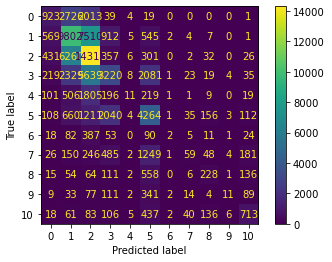

In [52]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

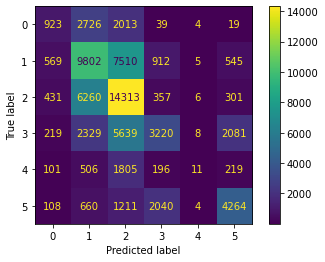

In [53]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

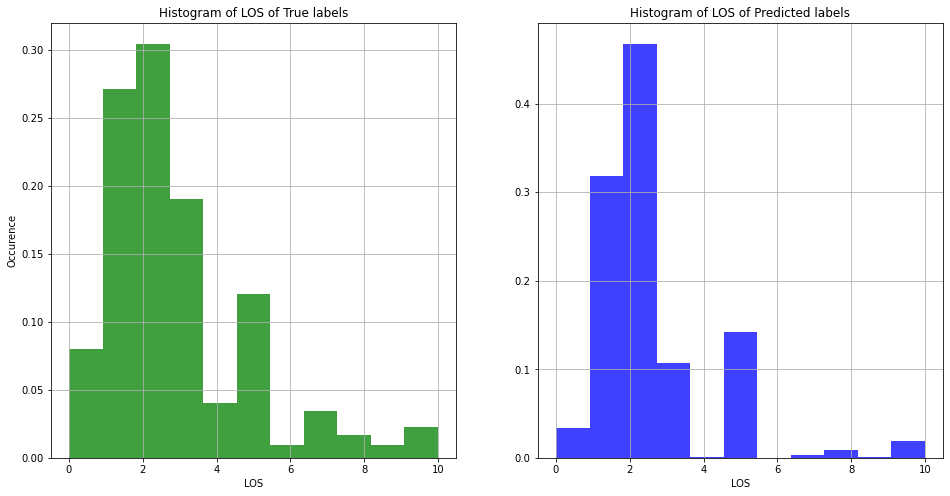

In [54]:
labels = np.unique(df['Stay'])
labels[-1] = '100+'
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
ax1.grid(True)
ax1.hist(y_test, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)
ax1.set_title('Histogram of LOS of True labels')
ax1.set_xlabel('LOS')
ax1.set_ylabel('Occurence')

ax2.grid(True)
ax2.hist(y_pred, bins=11, label=labels, density=True, facecolor='b', alpha=0.75)
ax2.set_title('Histogram of LOS of Predicted labels')
ax2.set_xlabel('LOS')



plt.show()

The best result we got for Random Forest was : Accuracy : 0.402 , Score : 0.89

Gradient Boost results :                       Accuracy : 0.415 , Score : 0.8920

CatBoost results :                             Accuracy : 0.428 , Score : 0.895


These results are slightly better but again we have the same problem as before.




[Back to top](#Content:)


<a id='part8'></a>

# Part 8 -  XGB Boost Classifier

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/Users/baraa/opt/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:00:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Accuracy : 0.427
Score : 0.8944


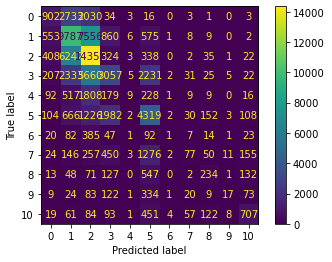

In [56]:
y_pred = xgb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

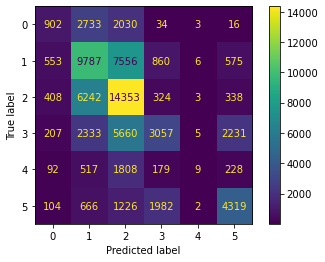

In [57]:
cm_reduced = cm[:6,:6]
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

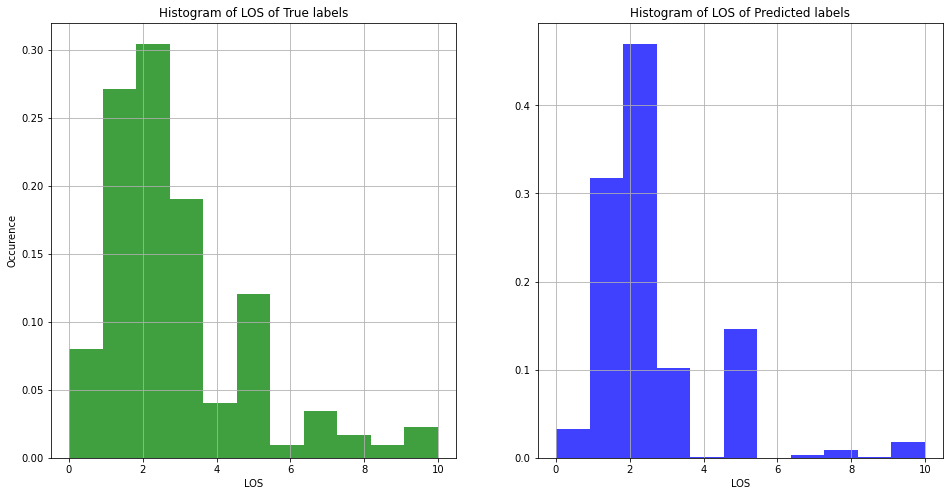

In [58]:

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)
ax1.grid(True)
ax1.hist(y_test, bins=11, label=labels, density=True, facecolor='g', alpha=0.75)
ax1.set_title('Histogram of LOS of True labels')
ax1.set_xlabel('LOS')
ax1.set_ylabel('Occurence')

ax2.grid(True)
ax2.hist(y_pred, bins=11, label=labels, density=True, facecolor='b', alpha=0.75)
ax2.set_title('Histogram of LOS of Predicted labels')
ax2.set_xlabel('LOS')



plt.show()

XGB Boost offers similar results to CatBoost, with the same issues

# Conclusion

We Have tried different models with different paramaters on the dataset, the results so far are not bad since most confusion happens between categories that are very close. In fact in our problem we have categories that are very close to each other which adds a layer of difficulty to the problem if we want to use accuracy as a metric. On the other hand the score method that measures how wrong the predictions are by taking into account the distance between categories gives descent results. We are now going to try classification with ANN and regression as well.